In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [3]:
train_ds = datasets.MNIST(
    root="MNIST_data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)
test_ds = datasets.MNIST(
    root="MNIST_data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

In [4]:
train_dataloader = DataLoader(train_ds, batch_size=512, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_ds, batch_size=512, shuffle=True, drop_last=True)

Feature batch shape: torch.Size([512, 1, 28, 28])
Labels batch shape: torch.Size([512])


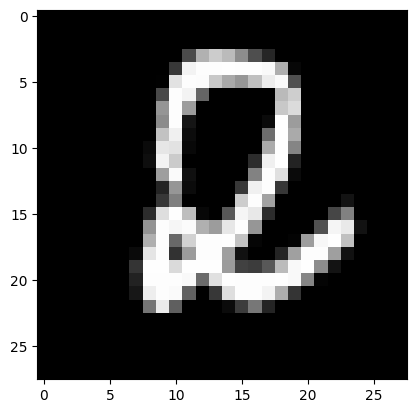

Label: 2


In [5]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [6]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        # Преобразуем входной тензор в одномерный вектор
        x = F.relu(self.flatten(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [7]:
model = NN()
model.to(device)

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

In [8]:
optimizer = Adam(params=model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

In [9]:
num_iter = 10
print('Train')
losses = []
for i in range(num_iter):
    print(f"Epoch {i+1} of {num_iter}")
    for data, label in tqdm(train_dataloader):
        data = data.to(device)
        label = label.to(device)
        outputs = model(data)
        loss = loss_func(outputs, label)
        losses.append(loss.item())
        _, preds = torch.max(outputs.data, 1)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

Train
Epoch 1 of 10


100%|██████████| 117/117 [00:04<00:00, 26.67it/s]


Epoch 2 of 10


100%|██████████| 117/117 [00:04<00:00, 26.59it/s]


Epoch 3 of 10


100%|██████████| 117/117 [00:04<00:00, 26.90it/s]


Epoch 4 of 10


100%|██████████| 117/117 [00:04<00:00, 26.77it/s]


Epoch 5 of 10


100%|██████████| 117/117 [00:04<00:00, 26.71it/s]


Epoch 6 of 10


100%|██████████| 117/117 [00:04<00:00, 27.02it/s]


Epoch 7 of 10


100%|██████████| 117/117 [00:04<00:00, 26.62it/s]


Epoch 8 of 10


100%|██████████| 117/117 [00:04<00:00, 26.95it/s]


Epoch 9 of 10


100%|██████████| 117/117 [00:04<00:00, 26.84it/s]


Epoch 10 of 10


100%|██████████| 117/117 [00:04<00:00, 26.43it/s]


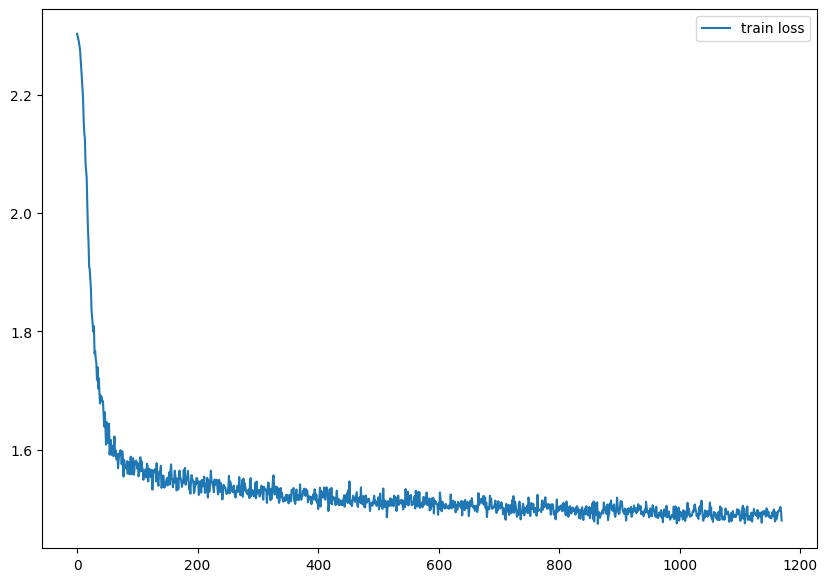

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(
    losses, linestyle='-', 
    label='train loss'
)
plt.legend()
plt.show()

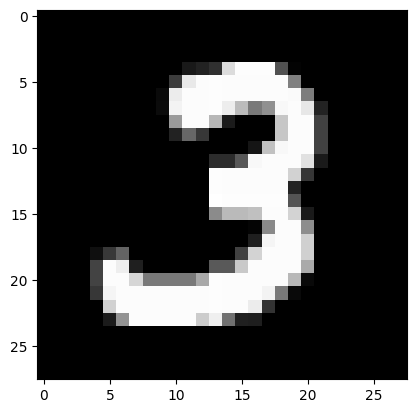

Label: 3
Pred: 3


In [11]:
# Model test
test_features, test_labels = next(iter(test_dataloader))
img = test_features[0].squeeze()
label = test_labels[0]
pred = model(test_features[0].to(device)).argmax()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
print(f"Pred: {pred}")

In [12]:
# Accuracy
correct = 0
total = len(test_dataloader)
for data, label in test_dataloader:
    data = data.to(device)
    output = model(data[0]).argmax().cpu()
    if (output == label[0]):
        correct += 1
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 94 %


Predicted value = 8
Your image:


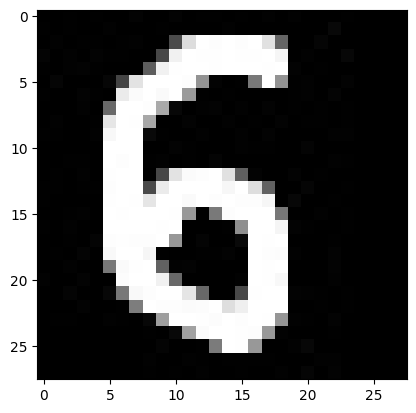

In [13]:
# Open your image from file
from PIL import Image
path = "MyImg.jpg"
img = Image.open(path)
img_tensor = transforms.ToTensor()(img)
print(f"Predicted value = {model(img_tensor.to(device)).argmax()}")
print("Your image:")
plt.imshow(img_tensor[0].detach().numpy(), cmap="gray")

Predicted value = 4
Your image:


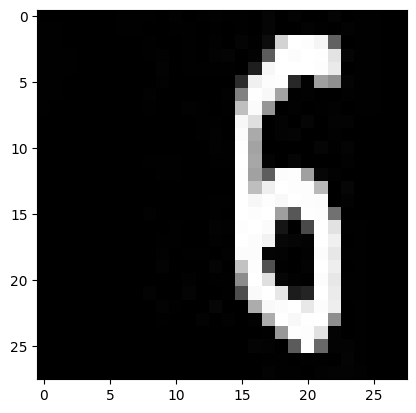

In [15]:
# Проверка работы нейронной сети на сдвинутом изображении
from PIL import Image
path = "MyImg2.jpg"
img = Image.open(path)
img_tensor = transforms.ToTensor()(img)
print(f"Predicted value = {model(img_tensor.to(device)).argmax()}")
print("Your image:")
plt.imshow(img_tensor[0].detach().numpy(), cmap="gray")

Predicted value = 3
Your image:


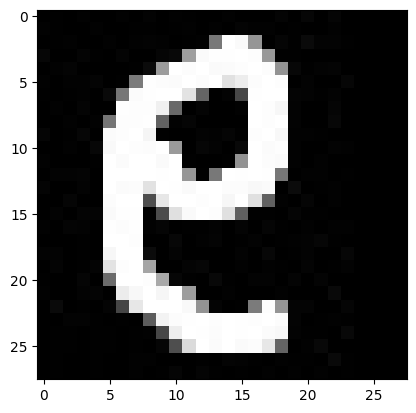

In [16]:
# Проверка работы нейронной сети на перевёрнутом изображении
from PIL import Image
path = "MyImg3.jpg"
img = Image.open(path)
img_tensor = transforms.ToTensor()(img)
print(f"Predicted value = {model(img_tensor.to(device)).argmax()}")
print("Your image:")
plt.imshow(img_tensor[0].detach().numpy(), cmap="gray")